<a href="https://colab.research.google.com/github/AUT-Student/SML-Project/blob/main/SML_Project_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Dataset

In [ ]:
!gdown 1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X

Downloading...
From: https://drive.google.com/uc?id=1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X
To: /content/SML_Project_Dataset.zip
100% 436k/436k [00:00<00:00, 6.79MB/s]


In [ ]:
!unzip /content/SML_Project_Dataset.zip

Archive:  /content/SML_Project_Dataset.zip
  inflating: Gold.csv                
  inflating: Kekhak.csv              
  inflating: Khodro.csv              
  inflating: Overall.csv             
  inflating: Shasta.csv              
  inflating: Atlas.csv               
  inflating: Dollar.csv              
  inflating: Foolad.csv              


In [ ]:
overall_dataset = pd.read_csv("/content/Overall.csv")
overall_dataset["<DTYYYYMMDD>"] = overall_dataset["Date"].apply(lambda x:int(x[:4]+x[5:7]+x[8:10]))
overall_dataset["Return"] = overall_dataset["Close"].diff()/overall_dataset["Close"]

In [ ]:
overall_dataset

,J-Date,Date,Open,High,Low,Close,Adj Close,Volume,<DTYYYYMMDD>,Return
0,1399-10-13,2021-01-02,1389700.0,1389700.0,1354110.0,1354114.0,1354147.1,6065577245,20210102,NaN
1,1399-10-14,2021-01-03,1347700.0,1357900.0,1345820.0,1355475.0,1355351.2,8925080297,20210103,0.001004
2,1399-10-15,2021-01-04,1361540.0,1375350.0,1361540.0,1374501.0,1374483.2,8791746228,20210104,0.013842
3,1399-10-16,2021-01-05,1372480.0,1372480.0,1350210.0,1350211.0,1350233.2,8904611865,20210105,-0.017990
4,1399-10-17,2021-01-06,1342160.0,1342160.0,1310450.0,1310709.0,1310755.8,8503250697,20210106,-0.030138
...,...,...,...,...,...,...,...,...,...,...
473,1401-10-03,2022-12-24,1500750.0,1538000.0,1500750.0,1538003.0,1538003.2,10103385881,20221224,0.027179
474,1401-10-04,2022-12-25,1547140.0,1563560.0,1547140.0,1563567.0,1563567.4,10776995540,20221225,0.016350
475,1401-10-05,2022-12-26,1566820.0,1576410.0,1563160.0,1576397.0,1576396.8,9446689906,20221226,0.008139
476,1401-10-07,2022-12-28,1588820.0,1647310.0,1588820.0,1647314.0,1647314.5,15175183890,20221228,0.043050


# Linear Regression

In [87]:
def mse(real, pred):
  return sum((real-pred)**2)

In [76]:
def normal_equation(X, Y):
  return np.linalg.inv(X.T @ X) @ X.T @ Y

## Only One Day

In [77]:
dataset = overall_dataset[["Date", "Return"]]

In [78]:
dataset["Prev-Return"] = dataset["Return"].shift(1)

<ipython-input-78-f85bb46906f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-Return"] = dataset["Return"].shift(1)


In [79]:
dataset.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [80]:
n = len(dataset)

In [81]:
X = np.stack([dataset["Prev-Return"].values, np.full(n, 1)], axis=-1)
Y = dataset["Return"].values

In [82]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [88]:
beta = normal_equation(X_train, Y_train)
Y_predicted = X_test @ beta

In [89]:
print(f"beta = {beta}")

beta = [3.64704067e-01 6.04380566e-05]


In [90]:
print(f"MSE = {mse(Y_predicted, Y_test)}")

MSE = 0.011668057456980668


## 5 Days

In [91]:
dataset = overall_dataset[["Date", "Return"]]

In [92]:
dataset["Prev-1-Return"] = dataset["Return"].shift(1)
dataset["Prev-2-Return"] = dataset["Return"].shift(2)
dataset["Prev-3-Return"] = dataset["Return"].shift(3)
dataset["Prev-4-Return"] = dataset["Return"].shift(4)
dataset["Prev-5-Return"] = dataset["Return"].shift(5)

<ipython-input-92-5324ea868e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-1-Return"] = dataset["Return"].shift(1)
<ipython-input-92-5324ea868e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-2-Return"] = dataset["Return"].shift(2)
<ipython-input-92-5324ea868e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [93]:
dataset.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [94]:
n = len(dataset)

In [95]:
X = np.stack([dataset["Prev-1-Return"].values,
              dataset["Prev-2-Return"].values,
              dataset["Prev-3-Return"].values,
              dataset["Prev-4-Return"].values,
              dataset["Prev-5-Return"].values,
              np.full(n, 1)], axis=-1)

Y = dataset["Return"].values

In [96]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [97]:
beta = normal_equation(X_train, Y_train)
Y_predicted = X_test @ beta

In [99]:
print(f"beta = {beta}")

beta = [ 4.56770336e-01 -2.52268650e-01  1.85632566e-01 -1.09778456e-01
  2.29407719e-02  2.14118287e-04]


In [100]:
print(f"MSE = {mse(Y_predicted, Y_test)}")

MSE = 0.01220482181345006


# Classification

In [101]:
dataset = overall_dataset[["Date", "Return"]]

In [102]:
dataset["Prev-Return"] = dataset["Return"].shift(1)

<ipython-input-102-f85bb46906f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-Return"] = dataset["Return"].shift(1)


In [105]:
dataset.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [111]:
X = dataset["Prev-Return"].values
Y = (dataset["Return"] > 0).values

In [114]:
n = len(dataset)

In [115]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [144]:
X_train_p = X_train[Y_train]
X_train_n = X_train[Y_train==False]

In [151]:
normal_p_mean = np.mean(X_train_p)
normal_p_var = np.var(X_train_p)
print(f"Positive Normal Params: {normal_p_mean}, {normal_p_var}")

Positive Normal Params: 0.003034647813411533, 0.0001554185379466679


In [152]:
normal_n_mean = np.mean(X_train_n)
normal_n_var = np.var(X_train_n)
print(f"Negative Normal Params: {normal_n_mean}, {normal_n_var}")

Negative Normal Params: -0.002910032804687265, 0.00012366374694993074


In [155]:
prior_p = len(X_train_p) / (len(X_train_p)+len(X_train_n))
prior_n = len(X_train_n) / (len(X_train_p)+len(X_train_n))
print(f"#positive = {len(X_train_p)}, #negative = {len(X_train_n)}")

#positive = 193, #negative = 187


In [170]:
def classification(X):
  prob_p = prior_p * scipy.stats.norm(normal_p_mean, normal_p_var).pdf(X) 
  prob_n = prior_n * scipy.stats.norm(normal_n_mean, normal_n_var).pdf(X) 
  
  return prob_p >= prob_n

In [171]:
Y_predicted = classification(X_test)

In [172]:
def accuracy(real, pred):
  return sum(real==pred) / len(real)

In [173]:
accuracy(Y_test, Y_predicted)

0.5833333333333334

In [177]:
max(sum(Y_test), sum(Y_test==False))/len(Y_test)

0.53125

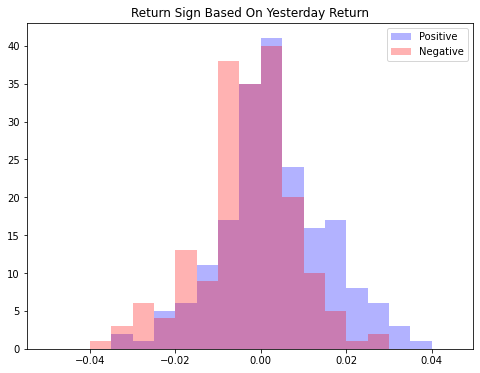

In [143]:
plt.hist(X_train[Y_train], alpha=0.3, color="blue", label="Positive", bins=np.arange(-0.05, +0.05, 0.005))
plt.hist(X_train[Y_train==False], alpha=0.3, color="red", label="Negative", bins=np.arange(-0.05, +0.05, 0.005))

plt.title("Return Sign Based On Yesterday Return")

plt.legend()

plt.gcf().set_size_inches(8, 6)
plt.show()